In [1]:
# Data loaded from https://www.hsl.fi/hsl/avoin-data

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
import gmaps
import googlemaps
import numpy as np

googlemaps = googlemaps.Client(key='')
gmaps.configure(api_key='')

plt.style.use({'figure.facecolor':'white'})

path = r'HSLdata/'
all_files = glob.glob(path + '**/*.csv', recursive=True)

In [2]:
df = pd.concat((pd.read_csv(file, dtype={'Return station id': object, 'Departure station id': object}) for file in all_files))
df.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.)
0,2016-05-31T23:58:00,2016-06-01T00:13:00,A27,Mannerheimintie,A35,Apollonkatu,2585.0,944.0
1,2016-05-31T23:58:00,2016-06-01T00:25:00,A01,Kaivopuisto,A12,Unioninkatu,2703.0,1627.0
2,2016-05-31T23:56:00,2016-06-01T00:08:00,A40,Lastenlehto,A06,Viiskulma,1194.0,705.0
3,2016-05-31T23:55:00,2016-06-01T00:06:00,B08,Sörnäisten metroasema,C02,Ooppera,2095.0,656.0
4,2016-05-31T23:55:00,2016-06-01T00:07:00,B08,Sörnäisten metroasema,C02,Ooppera,2111.0,715.0


In [3]:
df.info()
df_clean = df.reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12160731 entries, 0 to 246742
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Departure               object 
 1   Return                  object 
 2   Departure station id    object 
 3   Departure station name  object 
 4   Return station id       object 
 5   Return station name     object 
 6   Covered distance (m)    float64
 7   Duration (sec.)         float64
dtypes: float64(2), object(6)
memory usage: 835.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160731 entries, 0 to 12160730
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Departure               object 
 1   Return                  object 
 2   Departure station id    object 
 3   Departure station name  object 
 4   Return station id       object 
 5   Return station name     object 
 6   Covered distance (m)    float64
 7   Duration (se

In [4]:
df_clean.isnull().sum(axis=0)

Departure                   0
Return                      0
Departure station id      665
Departure station name    665
Return station id         360
Return station name       360
Covered distance (m)      136
Duration (sec.)            24
dtype: int64

In [5]:
df_nonull = df_clean.dropna().reset_index(drop=True)
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159565 entries, 0 to 12159564
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Departure               object 
 1   Return                  object 
 2   Departure station id    object 
 3   Departure station name  object 
 4   Return station id       object 
 5   Return station name     object 
 6   Covered distance (m)    float64
 7   Duration (sec.)         float64
dtypes: float64(2), object(6)
memory usage: 742.2+ MB


In [6]:
df_nonull['Departure'] = pd.to_datetime(df_nonull['Departure'])
df_nonull['Return'] = pd.to_datetime(df_nonull['Return'])
df_nonull.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.)
0,2016-05-31 23:58:00,2016-06-01 00:13:00,A27,Mannerheimintie,A35,Apollonkatu,2585.0,944.0
1,2016-05-31 23:58:00,2016-06-01 00:25:00,A01,Kaivopuisto,A12,Unioninkatu,2703.0,1627.0
2,2016-05-31 23:56:00,2016-06-01 00:08:00,A40,Lastenlehto,A06,Viiskulma,1194.0,705.0
3,2016-05-31 23:55:00,2016-06-01 00:06:00,B08,Sörnäisten metroasema,C02,Ooppera,2095.0,656.0
4,2016-05-31 23:55:00,2016-06-01 00:07:00,B08,Sörnäisten metroasema,C02,Ooppera,2111.0,715.0


In [7]:
# Removing oddities
df_reduced = df_nonull[df_nonull['Departure station name'].map(df_nonull['Departure station name'].value_counts()) > 20]
df_reduced = df_reduced[df_reduced['Return station name'].map(df_nonull['Return station name'].value_counts()) > 20]
df_reduced = df_reduced[df_reduced['Departure station name'] != df_reduced['Return station name']]  # Some trips start and end at the same station

print('Removed ' + str(len(df_nonull) - len(df_reduced)) + ' entries.')

Removed 900267 entries.


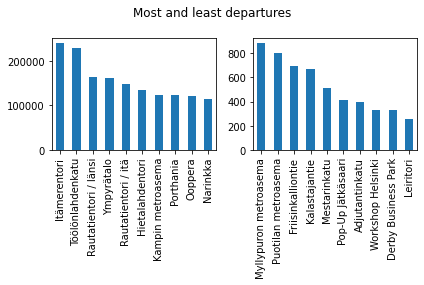

In [8]:
most_common_departures = df_reduced['Departure station name'].value_counts()[:10]
least_common_departures = df_reduced['Departure station name'].value_counts()[-10:]

fig, ax = plt.subplots(ncols=2)
fig.suptitle('Most and least departures')

most_common_departures.plot(kind='bar', ax=ax[0])
least_common_departures.plot(kind='bar', ax=ax[1])

plt.tight_layout()
plt.savefig("departures.png", format="png")
plt.show()

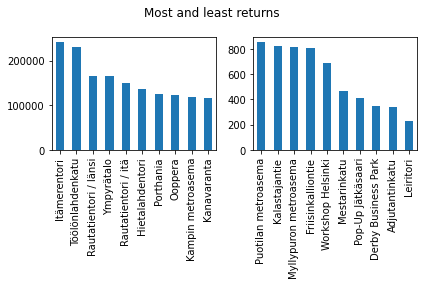

In [9]:
most_common_returns = df_reduced['Return station name'].value_counts()[:10]
least_common_returns = df_reduced['Return station name'].value_counts()[-10:]

fig, ax = plt.subplots(ncols=2)
fig.suptitle('Most and least returns')

most_common_returns.plot(kind='bar', ax=ax[0])
least_common_returns.plot(kind='bar', ax=ax[1])

plt.tight_layout()
plt.savefig("returns.png", format="png")
plt.show()

In [11]:
df_deps = df_reduced['Departure station name'].value_counts().reset_index()
df_deps.columns = ['Station', 'Count']
df_rets = df_reduced['Return station name'].value_counts().reset_index()
df_rets.columns = ['Station', 'Count']

df_combined = pd.concat([df_deps, df_rets]).groupby(['Station'], as_index=False)['Count'].sum()

def geocode(station):
    geocode_result = googlemaps.geocode(str(station))
    if len(geocode_result) > 0:
        return list(geocode_result[0]['geometry']['location'].values())
    else:
        return [np.Nan, np.Nan]
    

coordinates = df_combined['Station'].apply(lambda x: pd.Series(geocode(x), index=['Latitude', 'Longitude']))
df_combined = pd.concat([df_combined[:], coordinates[:]], axis="columns")

df_combined.sort_values(by=['Count'], ascending=False).head()

In [12]:
# Drop entries that were geocoded outside of the area
df_c2 = df_combined.copy()
df_c2 = df_c2[df_c2['Longitude'] > 24.4]
df_c2 = df_c2[df_c2['Longitude'] < 25.4]
df_c2 = df_c2[df_c2['Latitude'] > 60.1]
df_c2 = df_c2[df_c2['Latitude'] < 60.4]

387
374
370
370
368


In [13]:
print('Mapping ' + str(len(df_c2)) + ' values.')

locations = df_c2[['Latitude', 'Longitude']]
weights = df_c2['Count']
fig = gmaps.figure()
heatmap = gmaps.heatmap_layer(locations, weights=weights)
fig.add_layer(heatmap)
fig

Mapping 368 values.


Figure(layout=FigureLayout(height='420px'))

In [14]:
heatmap.max_intensity = 325000
heatmap.point_radius = 50

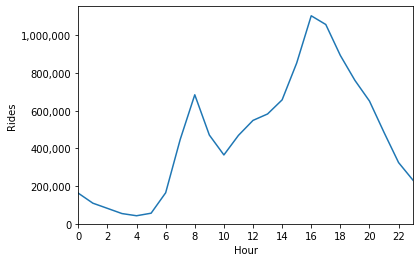

In [55]:
df_hours = df_reduced[['Departure', 'Departure station name']].copy(deep=True)
df_hours['Departure'] = df_hours['Departure'].dt.hour
df_hours = df_hours['Departure'].value_counts().reset_index()
df_hours.columns = ['Hour', 'Count']
df_hours = df_hours.sort_values(by=['Hour'], ascending=False)

fix, ax = plt.subplots()
fig.suptitle('Most and least departures')

df_hours.plot(x='Hour', y='Count', kind='line', ax=ax, legend=False)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_ylabel('Rides')
ax.get_yaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(range(0, 24, 2))
plt.xlim([0, 23])
plt.ylim([0, max(df_hours['Count']) + 50000])
plt.savefig("hours.png", format="png")
plt.show()


In [18]:
df_frequent_routes = df_reduced[['Departure station name', 'Return station name']].copy(deep=True)
df_frequent_routes = df_frequent_routes.groupby(['Departure station name', 'Return station name']).size().sort_values(ascending=False)
df_frequent_routes[:20]

Departure station name                 Return station name                  
Jämeräntaival                          Aalto-yliopisto (M), Korkeakouluaukio    34578
Aalto-yliopisto (M), Korkeakouluaukio  Jämeräntaival                            34239
Itämerentori                           Tyynenmerenkatu                          18314
Tyynenmerenkatu                        Itämerentori                             17516
Töölönlahdenkatu                       Baana                                    16905
Baana                                  Töölönlahdenkatu                         16113
Itämerentori                           Salmisaarenranta                         15790
Gyldenintie                            Itälahdenkatu                            15446
Itälahdenkatu                          Gyldenintie                              15309
Gyldenintie                            Heikkilänaukio                           12953
Salmisaarenranta                       Itämerentori            

In [42]:
locations = [['Kaupunkipyörät Jämeräntaival', 'Kaupunkipyörät Aalto-yliopisto (M)'],
            ['Kaupunkipyörät Itämerentori', 'Kaupunkipyörät Tyynenmerenkatu'],
            ['Kaupunkipyörät Töölönlahdenkatu', 'Kaupunkipyörät Baana'],
            ['Kaupunkipyörät Itämerentori', 'Kaupunkipyörät Salmisaarenranta'],
            ['Kaupunkipyörät Gyldenintie', '60.154074, 24.880002'],
            ['Kaupunkipyörät Gyldenintie', '60.150476, 24.881303'],
            ['Kaupunkipyörät Töölönlahdenkatu', 'Kaupunkipyörät Itämerentori'],
            ['Kaupunkipyörät Kaisaniemenpuisto', 'Kaupunkipyörät Ympyrätalo'],
            ['60.162333, 24.929307', 'Kaupunkipyörät Itämerentori'],
            ['Kaupunkipyörät Matinkartanontie', 'Kaupunkipyörät Suomenlahdentie']]
        
locations_gc = []

for loc in locations:
    for i in loc:
        geocoded = googlemaps.geocode(i)
        locations_gc.append((geocoded[0]['geometry']['location']['lat'], geocoded[0]['geometry']['location']['lng']))

route_fig = gmaps.figure()

for i in range(0, len(locations_gc), 2):
    print(str(locations_gc[i]) + " " + str(locations_gc[i + 1]))
    dir_layer = gmaps.directions_layer(locations_gc[i], locations_gc[i + 1], travel_mode='WALKING', 
                                       show_markers=False, stroke_color='#FB3640', stroke_opacity=1.0)
    route_fig.add_layer(dir_layer)

symbols = gmaps.symbol_layer(locations_gc, fill_color='#2B303A', stroke_color='#2B303A', scale=4)
route_fig.add_layer(symbols)
    
route_fig

(60.188118, 24.8350329) (60.184312, 24.8266709)
(60.16353089999999, 24.9145164) (60.156838, 24.9206609)
(60.17219069999999, 24.9393078) (60.16408800000001, 24.9225657)
(60.16353089999999, 24.9145164) (60.1647814, 24.9009608)
(60.1583842, 24.8766659) (60.15428199999999, 24.8799224)
(60.1583842, 24.8766659) (60.1506037, 24.8815931)
(60.17219069999999, 24.9393078) (60.16353089999999, 24.9145164)
(60.1731989, 24.943301) (60.180863, 24.9494)
(60.16229550000001, 24.9295504) (60.16353089999999, 24.9145164)
(60.156258, 24.752489) (60.16001499999999, 24.741294)


Figure(layout=FigureLayout(height='420px'))